In [68]:
#Load all the essential packages for the analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


#Font settings
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath, amssymb}"

# Data

Download the original Omni-MATH dataset from https://github.com/KbsdJames/Omni-MATH and add it to the data folder.

# Figure A3

Domain distribution of the Omni-MATH dataset

In [15]:
#Count the number of questions per primary domain (i.e. first layer of nodes in the domain tree)
from Performance_eval import parse_domain

file = 'Omni-MATH.jsonl'
with open(file, 'r'):
    data_df = pd.read_json(file, lines=True)


data_df_new = data_df.explode('domain').reset_index()
data_df_new['domain'] = data_df_new['domain'].apply(parse_domain)
data_df_deduplicated = data_df_new.drop_duplicates(subset=None)
domain_df = data_df_deduplicated['domain'].value_counts().reset_index()
domain_df.columns = ['domain', 'n questions']

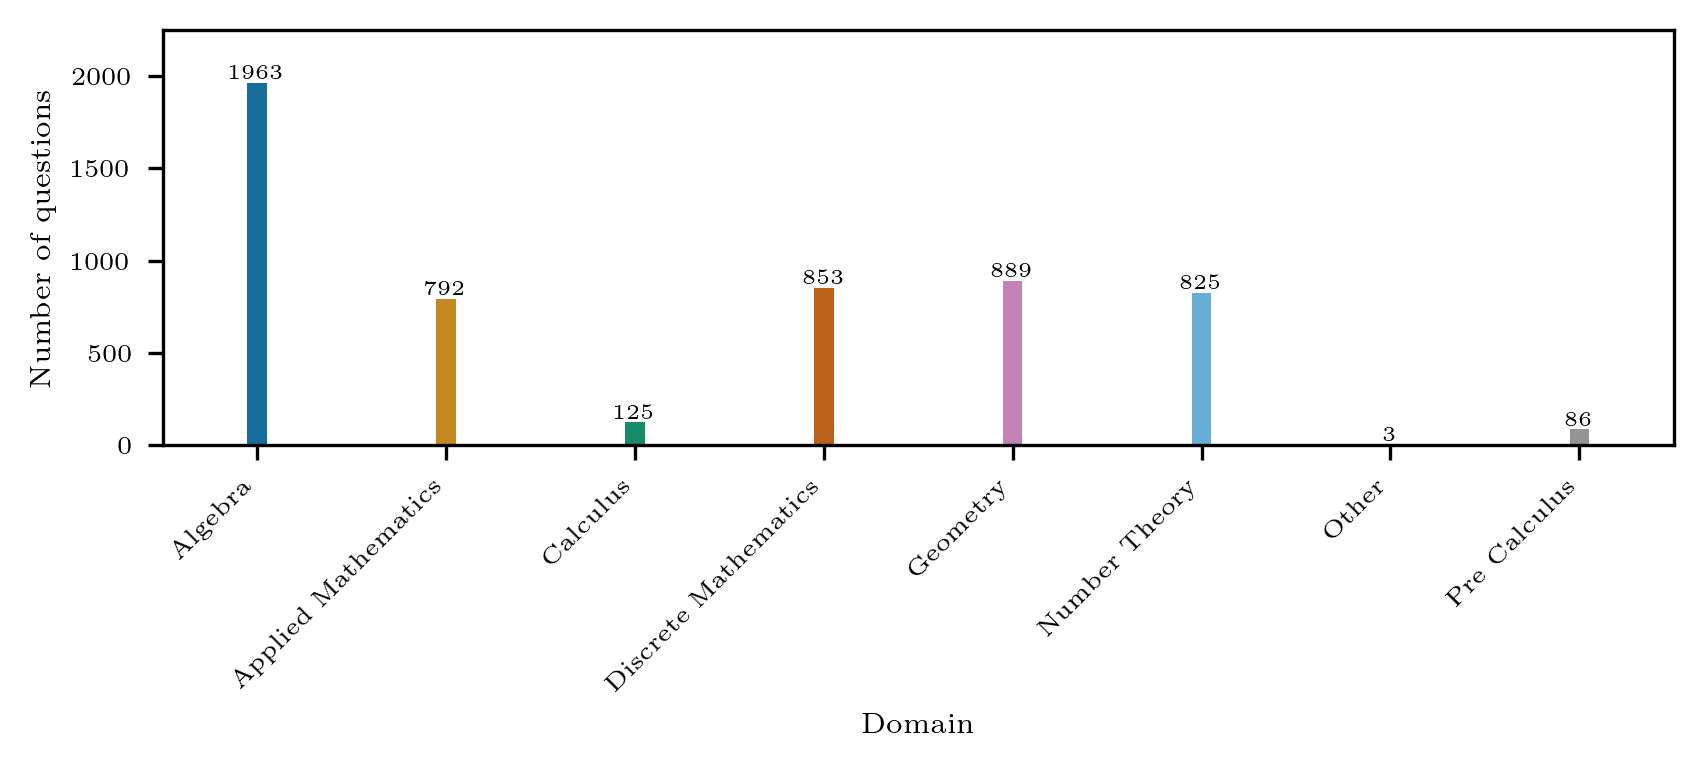

In [16]:
unique_domains = domain_df['domain'].unique()
color_palette = ['#0173b2', '#de8f05','#029e73', '#d55e00','#cc78bc','#56b4e9', '#fbafe4', '#949494']

### Plot: Domain distribution
figA3, axA3 = plt.subplots(figsize=(6.5, 9/5), dpi=300)

sns.barplot(ax = axA3, data = domain_df.sort_values(by='domain'), x='domain', y= 'n questions', hue = 'domain', palette = color_palette, gap=0.87, native_scale = True, alpha=1)
for container in axA3.containers:
	axA3.bar_label(container, fontsize=5)
axA3.set_title('')
axA3.set_ylabel('Number of questions', fontsize=7)
axA3.set_xlabel('Domain', fontsize=7)
axA3.set_ylim(0, 2250)
axA3.set_xlim(-0.5, 7.5)
axA3.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
axA3.set_xticklabels(labels = ['Algebra', 'Applied Mathematics', 'Calculus', 'Discrete Mathematics', 'Geometry', 'Number Theory', 'Other', 'Pre Calculus'], rotation=45, fontsize = 6, ha = 'right')
axA3.set_yticks(range(0, 2250, 500))
axA3.set_yticklabels(range(0, 2250, 500), fontsize = 6)

plt.savefig('FigureA3.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure A4

Classification of difficulty levels of the Omni-MATH dataset in balanced difficulty tiers.

In [59]:
#Compute the number of questions per difficulty level and classify them into balanced tiers
file = 'Omni-MATH.jsonl'
with open(file, 'r'):
    data_df = pd.read_json(file, lines=True)

difficulty_levels_df = data_df['difficulty'].value_counts().reset_index()
difficulty_levels_df.columns = ['difficulty level', 'n questions']

data_df['Tier'] = pd.qcut(
    data_df['difficulty'],
    q=4,
    labels=[f'Tier {i+1}' for i in range(4)]
    )
questions_per_tier = data_df['Tier'].value_counts()

#Number of questions per tier
print('Number of questions per difficulty tier \n' + str(questions_per_tier))

difficulty_in_each_tier = data_df.groupby('Tier')['difficulty'].apply(lambda x: sorted(x.unique().tolist()))

#Classification of questions per tier according to qcut
print('\nClassification of difficulty levels in tiers \n' + str(difficulty_in_each_tier))

Number of questions per difficulty tier 
Tier
Tier 1    1445
Tier 2    1304
Tier 4    1030
Tier 3     649
Name: count, dtype: int64

Classification of difficulty levels in tiers 
Tier
Tier 1      [1.0, 1.5, 2.0, 2.25, 2.5, 3.0, 3.5, 3.75, 4.0]
Tier 2                        [4.25, 4.375, 4.5, 4.75, 5.0]
Tier 3                                     [5.25, 5.5, 6.0]
Tier 4    [6.25, 6.5, 6.75, 7.0, 7.5, 8.0, 8.25, 8.5, 9....
Name: difficulty, dtype: object


/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/3738390304.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_in_each_tier = data_df.groupby('Tier')['difficulty'].apply(lambda x: sorted(x.unique().tolist()))


/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/1142311805.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  part_1 = [custom_palette[3] for i in range(len(difficulty_in_each_tier[0]))]
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/1142311805.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  part_2 = [custom_palette[2] for i in range(len(difficulty_in_each_tier[1]))]
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/1142311805.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

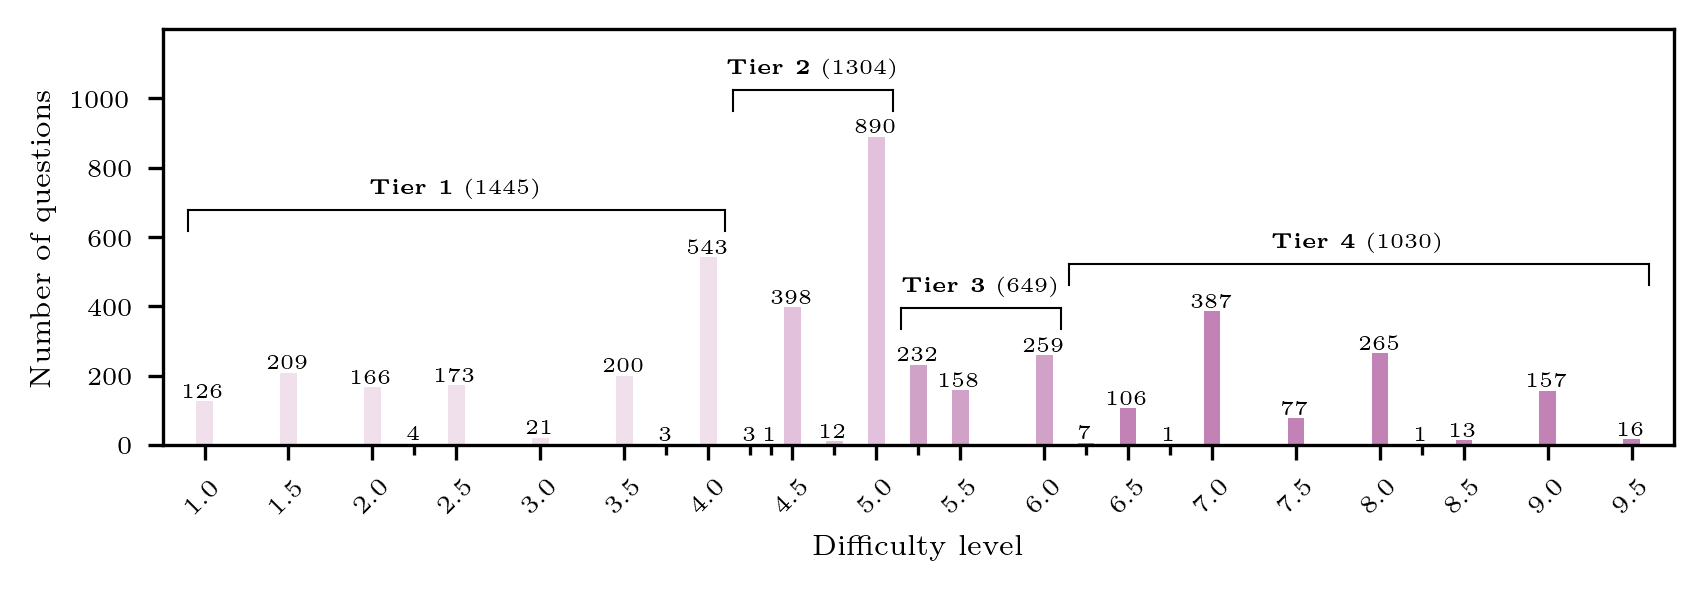

In [61]:
#Assign monotone colors to the tiers
unique_difficulty_levels = difficulty_levels_df['difficulty level'].unique()
custom_palette = [ "#cc78bc", '#d99acd', '#e6bcde', '#f2ddee']

part_1 = [custom_palette[3] for i in range(len(difficulty_in_each_tier[0]))]
part_2 = [custom_palette[2] for i in range(len(difficulty_in_each_tier[1]))]
part_3 = [custom_palette[1] for i in range(len(difficulty_in_each_tier[2]))]
part_4 = [custom_palette[0] for i in range(len(difficulty_in_each_tier[3]))]
color_palette = part_1 + part_2 + part_3 + part_4

### Plot: Difficulty distribution and classification into Tiers
figA4, axA4 = plt.subplots(figsize=(6.5, 9/5), dpi=300)

sns.barplot(ax = axA4, data = difficulty_levels_df, x='difficulty level', y= 'n questions', hue = 'difficulty level', palette = color_palette, gap=0, native_scale = True, alpha=1)
for container in axA4.containers:
	axA4.bar_label(container, fontsize=5)
axA4.set_title('')
axA4.set_ylabel('Number of questions', fontsize=7)
axA4.set_xlabel('Difficulty level', fontsize=7)
axA4.set_ylim(0, 1200)
axA4.set_xlim(1-0.25,9.5+0.25)
axA4.set_xticks(difficulty_levels_df['difficulty level'].round(3))
axA4.set_xticklabels(difficulty_levels_df['difficulty level'].round(3), rotation=45, fontsize = 6)
axA4.set_yticks(range(0, 1200, 200))
axA4.set_yticklabels(range(0, 1200, 200), fontsize = 6)

tick_positions = difficulty_levels_df['difficulty level'].round(3).tolist()

#Only display labels every 0.5 increment
tolerance = 1e-8  
tick_labels = [
    f"{tick}" if abs(tick * 2 - round(tick * 2)) < tolerance else ''
    for tick in tick_positions
]

axA4.set_xticks(tick_positions)
axA4.set_xticklabels(tick_labels, rotation=45, fontsize=6)
small_tick_length = 2.5
for tick in axA4.xaxis.get_major_ticks():
    if tick.label1.get_text() == "":
        tick.tick1line.set_markersize(small_tick_length)
        tick.tick2line.set_markersize(small_tick_length)

#Create custom legend handles with the desired colors
custom_handles = [
    mpatches.Patch(color=custom_palette[3], label='Tier 1'),
    mpatches.Patch(color=custom_palette[2], label='Tier 2'),
    mpatches.Patch(color=custom_palette[1], label='Tier 3'),
    mpatches.Patch(color=custom_palette[0], label='Tier 4')
]

#Draw brackets to illustrate the classification into Tiers
bars = axA4.patches
first_nine = bars[:9]
x_left = first_nine[0].get_x() -0.05 #Left edge of the first bar
x_right = first_nine[-1].get_x() + first_nine[-1].get_width() +0.05 #Right edge of the 9th bar
y_top = max(bar.get_y() + bar.get_height() for bar in first_nine) + 75 #Maximum height of the bars
y_range = axA4.get_ylim()[1] - axA4.get_ylim()[0] 
margin = 0.05 * y_range  # 5% of the y-range
y_bracket = y_top + margin 

axA4.plot([x_left, x_left], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_right, x_right], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_left, x_right], [y_bracket, y_bracket], color='black', lw=0.5)
axA4.text((x_left + x_right) / 2, y_bracket + margin - 25, r'\textbf{{Tier 1}} (1445)', 
         ha='center', va='bottom', fontsize=5)

next_bars = bars[9:14]
x_left = next_bars[0].get_x() -0.05             
x_right = next_bars[-1].get_x() + next_bars[-1].get_width() +0.05 
y_top = max(bar.get_y() + bar.get_height() for bar in next_bars) + 75
y_range = axA4.get_ylim()[1] - axA4.get_ylim()[0]
margin = 0.05 * y_range 
y_bracket = y_top + margin

axA4.plot([x_left, x_left], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_right, x_right], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_left, x_right], [y_bracket, y_bracket], color='black', lw=0.5)
axA4.text((x_left + x_right) / 2, y_bracket + margin - 25, r'\textbf{Tier 2} (1304)', ha = 'center', va = 'bottom', fontsize=5)

next_bars = bars[14:17]
x_left = next_bars[0].get_x() -0.05           
x_right = next_bars[-1].get_x() + next_bars[-1].get_width() +0.05 
y_top = max(bar.get_y() + bar.get_height() for bar in next_bars) + 75
y_range = axA4.get_ylim()[1] - axA4.get_ylim()[0]
margin = 0.05 * y_range  
y_bracket = y_top + margin

axA4.plot([x_left, x_left], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_right, x_right], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_left, x_right], [y_bracket, y_bracket], color='black', lw=0.5)
axA4.text((x_left + x_right) / 2, y_bracket + margin - 25, r'\textbf{Tier 3} (649)', ha = 'center', va = 'bottom', fontsize=5)

next_bars = bars[17:]
x_left = next_bars[0].get_x() -0.05             
x_right = next_bars[-1].get_x() + next_bars[-1].get_width() +0.05 
y_top = max(bar.get_y() + bar.get_height() for bar in next_bars) + 75
y_range = axA4.get_ylim()[1] - axA4.get_ylim()[0]
margin = 0.05 * y_range  
y_bracket = y_top + margin

axA4.plot([x_left, x_left], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_right, x_right], [y_top, y_bracket], color='black', lw=0.5)
axA4.plot([x_left, x_right], [y_bracket, y_bracket], color='black', lw=0.5)
axA4.text((x_left + x_right) / 2, y_bracket + margin - 25, r'\textbf{Tier 4} (1030)', ha = 'center', va = 'bottom', fontsize=5)

plt.savefig('FigureA4.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure A5

Analysis of the completion token distribution, and the relationship between completion token usage and accuracy of gpt-4o on Omni-MATH.

In [ ]:
#Create dataframes with necessary metadata per question for gpt-4o
from Performance_eval import get_dataframe 

df_4o = get_dataframe('omni-judge_output_4o.jsonl')
num_tiers = 4
df_4o['difficulty'] = pd.qcut(
    df_4o['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/3126493037.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_tier_4o = df_4o.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/3126493037.py:87: RuntimeWarning: invalid value encountered in divide
  y_4o = (bins_correct_4o/(bins_correct_4o+bins_false_4o)).tolist()[0:7]


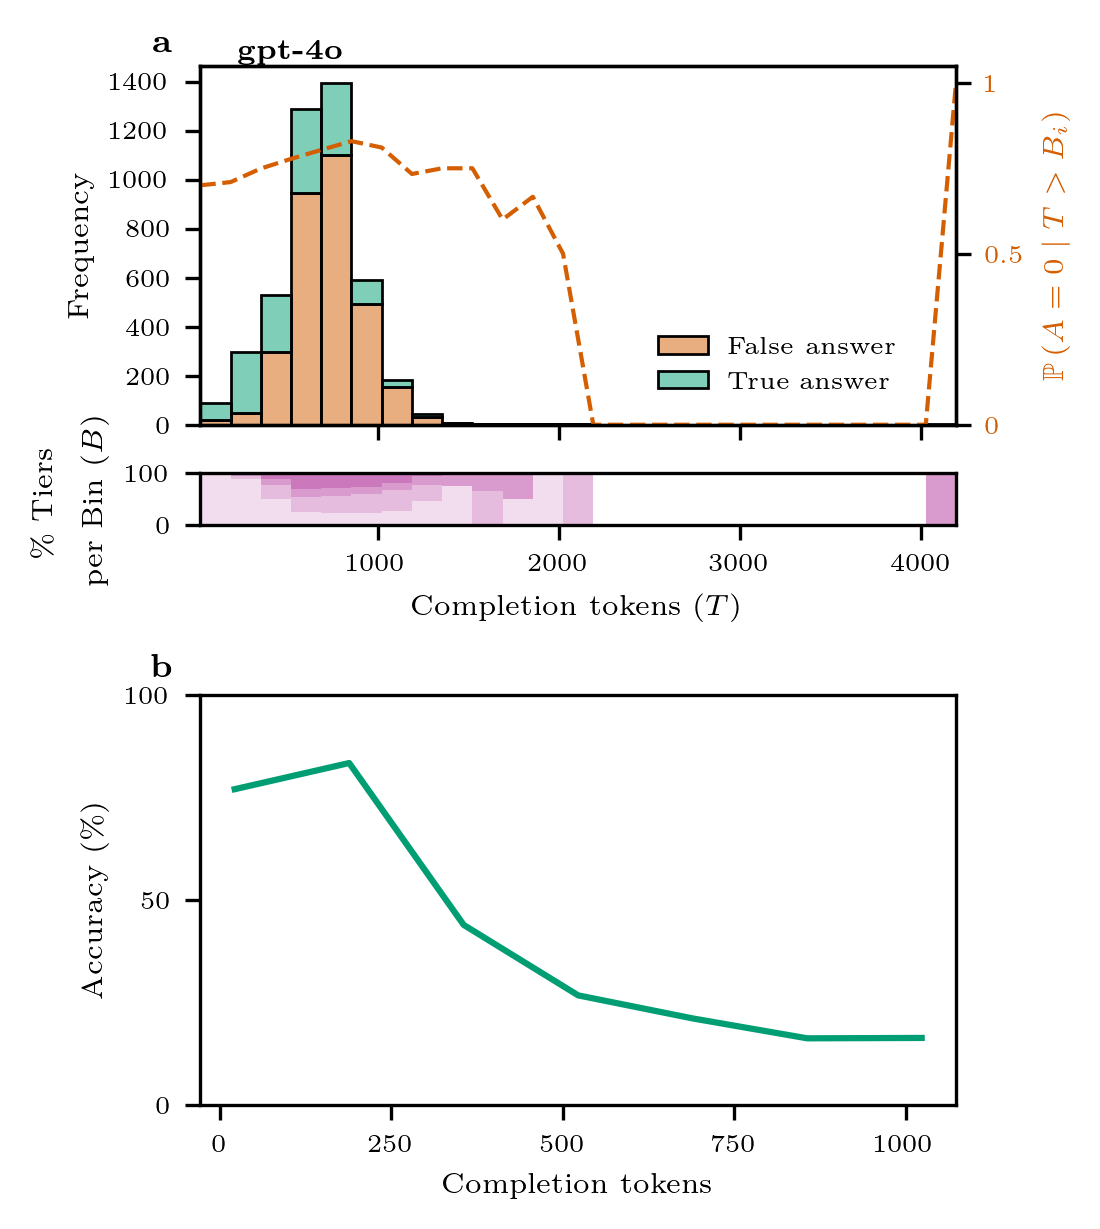

In [ ]:

from Performance_eval import conditional_prob

### Plot: gpt-4 analysis of completion token usage
figA5, axA5 = plt.subplot_mosaic([['A1'], ['A2'], ['B']], figsize = (6.5/2, 9/2), gridspec_kw={'wspace': 0.12, 'hspace': 0.4}, dpi = 300, height_ratios=[7, 1, 8])

custom_palette_correctness = [ "#009E73", "#D55E00"]
custom_palette_tiers = [ "#cc78bc", '#d99acd', '#e6bcde', '#f2ddee']


### PLot A1: Completion token distribution
tokens_of_correct_questions = df_4o[df_4o['correctness'] == True]['completion_tokens']
tokens_of_incorrect_questions = df_4o[df_4o['correctness'] == False]['completion_tokens']

bins_4o, edges_4o = np.histogram(df_4o['completion_tokens'], bins=25)
bins_correct_4o, edges_correct_4o = np.histogram(tokens_of_correct_questions, bins=edges_4o)
bins_false_4o, edges_false_4o = np.histogram(tokens_of_incorrect_questions, bins=edges_4o)

df_4o['bin'] = pd.cut(df_4o['completion_tokens'], bins=edges_4o, include_lowest=True)
counts_by_tier_4o = df_4o.groupby(['bin', 'difficulty']).size().unstack(fill_value=0)
normalised_counts_by_tier_4o = counts_by_tier_4o.div(counts_by_tier_4o.sum(axis=1), axis=0)

sns.histplot(
    data=df_4o,
    x='completion_tokens',
    hue='correctness',
    hue_order=[True, False],
    bins=edges_4o,
    multiple='stack',
    edgecolor='black',
    alpha=0.5,
    palette=custom_palette_correctness,
    legend=False,
    ax=axA5['A1'],
)

axA5['A1'].set_ylabel('Frequency', fontsize = 7)
axA5['A1'].set_xlim(22,4193)
axA5['A1'].set_xticks([ 1000, 2000, 3000, 4000])
axA5['A1'].set_yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
axA5['A1'].set_xticklabels([], fontsize = 6)  
axA5['A1'].set_yticklabels([0, 200, 400, 600, 800, 1000, 1200, 1400], fontsize = 6)

#Compute conditional error rate
conditional_prob_4o = conditional_prob(bins_4o, bins_correct_4o, bins_false_4o)

#Create second y-axis to plot conditional error rate
ax_prob_4o = axA5['A1'].twinx()
probs = conditional_prob_4o + [1]
ax_prob_4o.plot(edges_4o, probs, color="#D55E00", linestyle='--', linewidth=1)
probability = (r"$\mathbb{P}\left(A = 0 \mid T > B_i \right)$")
ax_prob_4o.set_ylabel(probability, color="#D55E00", fontsize=7)  # is a conditional probability
ax_prob_4o.tick_params(axis='y', labelcolor="#D55E00")
ax_prob_4o.set_yticks([0,0.5,1])
ax_prob_4o.set_yticklabels([0,0.5,1], fontsize = 6)
ax_prob_4o.set_yticklabels([0, 0.5, 1], fontsize = 6)
ax_prob_4o.set_ylim(0, 1+0.05)

### Plot A2: Proportion of the difficulty tiers per histogram bin
bins_c, edges_c = np.histogram(df_4o['completion_tokens'], bins=25)

sns.histplot(
    data=df_4o,
    x='completion_tokens',
    hue='difficulty',
    hue_order=['Tier 4', 'Tier 3', 'Tier 2', 'Tier 1'],
    bins=edges_c,
    multiple='fill',  #Each bar is normalized
    edgecolor=None,
    alpha=1,
    palette=custom_palette_tiers,
    legend=False,
    ax=axA5['A2'],
)

axA5['A2'].set_xlabel(r'Completion tokens ($T$)', fontsize=7)
axA5['A2'].set_ylabel(r'\hspace{-3mm}\% Tiers \\ per Bin ($B$)', fontsize=7)
axA5['A2'].set_xlim(22, 4193)
axA5['A2'].set_xticks([1000, 2000, 3000, 4000])
axA5['A2'].set_xticklabels([ 1000, 2000, 3000, 4000], fontsize=6)
axA5['A2'].set_yticks([0, 1])
axA5['A2'].set_yticklabels([0,100], fontsize=6)



### Plot B: Accuracy vs. Completion tokens
x_4o = edges_4o.tolist()[0:7]
y_4o = (bins_correct_4o/(bins_correct_4o+bins_false_4o)).tolist()[0:7]

sns.lineplot(x = x_4o, y=y_4o, ax=axA5['B'], color='#029e73')

axA5['B'].set_ylim(0, 1)
axA5['B'].set_yticks([0, 0.5, 1])
axA5['B'].set_yticklabels([0, 50, 100], fontsize=6)
axA5['B'].set_xticks([0, 250, 500, 750, 1000])
axA5['B'].set_xticklabels([0, 250, 500, 750, 1000], fontsize=6)
axA5['B'].set_xlabel(r'Completion tokens', fontsize=7)
axA5['B'].set_ylabel(r'Accuracy (\%)', fontsize=7)



#========================================================= Adjust layout ========================================================

axA5['A1'].text(0.05, 1.075, r'\textbf{gpt-4o}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA5['A1'].transAxes, fontsize=7
               )
axA5['A1'].text(-0.05,1.1, r'\textbf{a}', horizontalalignment='center', weight='bold', verticalalignment='top', transform=axA5['A1'].transAxes, fontsize=8)
axA5['B'].text(-0.05,1.1, r'\textbf{b}', horizontalalignment='center', weight='bold', verticalalignment='top', transform=axA5['B'].transAxes, fontsize=8)

pos_A2 = axA5['A2'].get_position()
axA5['A2'].set_position([pos_A2.x0, pos_A2.y0 + 0.045, pos_A2.width, pos_A2.height])

labels = [ 'False answer', 'True answer']
axA5['A1'].legend(labels, loc='lower right', fontsize=6, edgecolor = None, frameon = False, bbox_to_anchor=(0.95, 0.025))  

plt.savefig('FigureA5.png', dpi=300, bbox_inches='tight')
plt.show()


# Figure A6

Comparison of the distribution of reasoning tokens between o1-mini and o3-mini (m), and between o3-mini (m) and o3-mini (h) for **correctly** answered problems in the Omni-MATH dataset.

In [65]:
#Create dataframes with necessary metadata per question for reasoning models
from Performance_eval import get_dataframe_reasoning_models

#======================================================== o1-mini ========================================================
df_o1 = get_dataframe_reasoning_models('omni-judge_output_o1.jsonl')
df_o1['difficulty'] = pd.qcut(
    df_o1['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

#======================================================== o3-mini (m) ========================================================
df_o3 = get_dataframe_reasoning_models('omni-judge_output_o3.jsonl')
df_o3['difficulty'] = pd.qcut(
    df_o3['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

#======================================================== o3-mini (h) ========================================================
df_o3_high = get_dataframe_reasoning_models('omni-judge_output_o3_high.jsonl')
df_o3_high['difficulty'] = pd.qcut(
    df_o3_high['difficulty'],
    q=num_tiers,
    labels=[f'Tier {i+1}' for i in range(num_tiers)]
    )

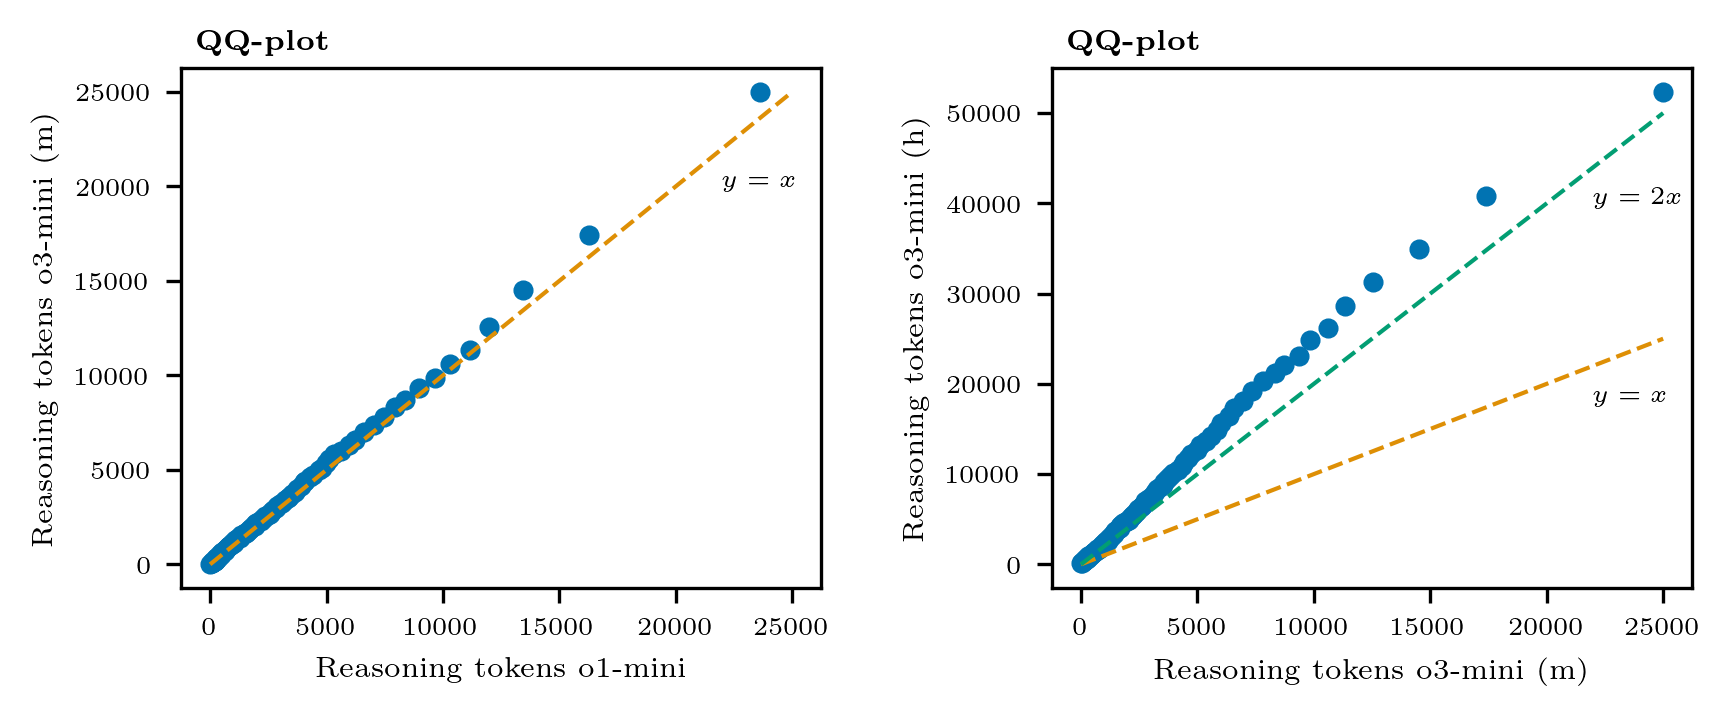

In [66]:
### Plot: QQ-plots
figureA6, axA6 = plt.subplot_mosaic([['A', 'B']], figsize=(6.5, 9/4), gridspec_kw={ 'wspace':0.36}, dpi=300)

num_quantiles = 100
qs = np.linspace(0, 100, num_quantiles)

### Plot A: qq-plot of o1-mini against o3-mini (m)
df_o1_correct = df_o1[df_o1['correctness'] == True]
df_o3_correct = df_o3[df_o3['correctness'] == True]
quantiles_o1 = np.percentile(df_o1_correct['reasoning_tokens'], qs)
quantiles_o3 = np.percentile(df_o3_correct['reasoning_tokens'], qs)

sns.scatterplot(x = quantiles_o1, y =quantiles_o3, color='#0173b2', s=20, alpha=1, ax = axA6['A'], edgecolor = None)

min_val = min(quantiles_o1[0], quantiles_o3[0])
max_val = max(quantiles_o1[-1], quantiles_o3[-1])

sns.lineplot(x = [min_val, max_val], y = [min_val, max_val], color = '#de8f05', linewidth=1, linestyle='--', ax = axA6['A'])

axA6['A'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
axA6['A'].set_yticks([0, 5000, 10000, 15000, 20000, 25000])
axA6['A'].set_xticklabels([0, 5000, 10000, 15000, 20000, 25000], fontsize = 6)
axA6['A'].set_yticklabels([0, 5000, 10000, 15000, 20000, 25000], fontsize = 6)
axA6['A'].set_xlabel('Reasoning tokens o1-mini', fontsize = 7)
axA6['A'].set_ylabel('Reasoning tokens o3-mini (m)', fontsize = 7)
axA6['A'].text(0.025, 1.075, r'\textbf{QQ-plot}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA6['A'].transAxes, fontsize=7)
axA6['A'].text(22000, 20000, r'$y = x$', horizontalalignment='left', fontsize = 6)

### Plot B: qq-plot of o3-mini (m) against o3-mini (h)
df_o3_unl_correct = df_o3_high[df_o3_high['correctness'] == True]
quantiles_o3 = np.percentile(df_o3_correct['reasoning_tokens'], qs) 
quantiles_o3_unlimited = np.percentile(df_o3_unl_correct['reasoning_tokens'], qs)

sns.scatterplot(x = quantiles_o3, y = quantiles_o3_unlimited, color='#0173b2', s=20, ax = axA6['B'], edgecolor = None, alpha = 1)

min_val = min(quantiles_o3[0], quantiles_o3_unlimited[0])
max_val = max(quantiles_o3[-1], quantiles_o3_unlimited[-1])

axA6['B'].plot([0,25000], [0,25000], '--', label='y = x', color = '#de8f05', linewidth=1)
axA6['B'].plot([0,25000], [0,50000], '--', label='y = 2x', color = '#029e73', linewidth=1)
axA6['B'].set_xticks([0, 5000, 10000, 15000, 20000, 25000])
axA6['B'].set_yticks([0, 10000, 20000, 30000, 40000, 50000])
axA6['B'].set_xticklabels([0, 5000, 10000, 15000, 20000, 25000], fontsize = 6)
axA6['B'].set_yticklabels([0, 10000, 20000, 30000, 40000, 50000], fontsize = 6)
axA6['B'].set_xlabel('Reasoning tokens o3-mini (m)', fontsize = 7)
axA6['B'].set_ylabel('Reasoning tokens o3-mini (h) ', fontsize=7)
axA6['B'].text(0.025, 1.075, r'\textbf{QQ-plot}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA6['B'].transAxes, fontsize=7)

axA6['B'].text(22000, 18000, r'$y = x$', horizontalalignment='left', fontsize = 6)
axA6['B'].text(22000, 40000, r'$y = 2x$', horizontalalignment='left', fontsize = 6)

plt.savefig('FigureA6.png', dpi=300, bbox_inches='tight')
plt.show()


# Figure A7

Stratification of Figure 4a for the mathematical domains of the Omni-MATH dataset.

/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/667722381.py:54: RuntimeWarning: invalid value encountered in divide
  y_o3 = (bins_o3_correct/(bins_o3_correct+bins_o3_false)).tolist()[0:6]
/var/folders/2b/wwf70wd17zb31hbys4zvv1c80000gn/T/ipykernel_65206/667722381.py:56: RuntimeWarning: invalid value encountered in divide
  y_o3_high = (bins_o3_high_correct/(bins_o3_high_correct+bins_o3_high_false)).tolist()[0:6]


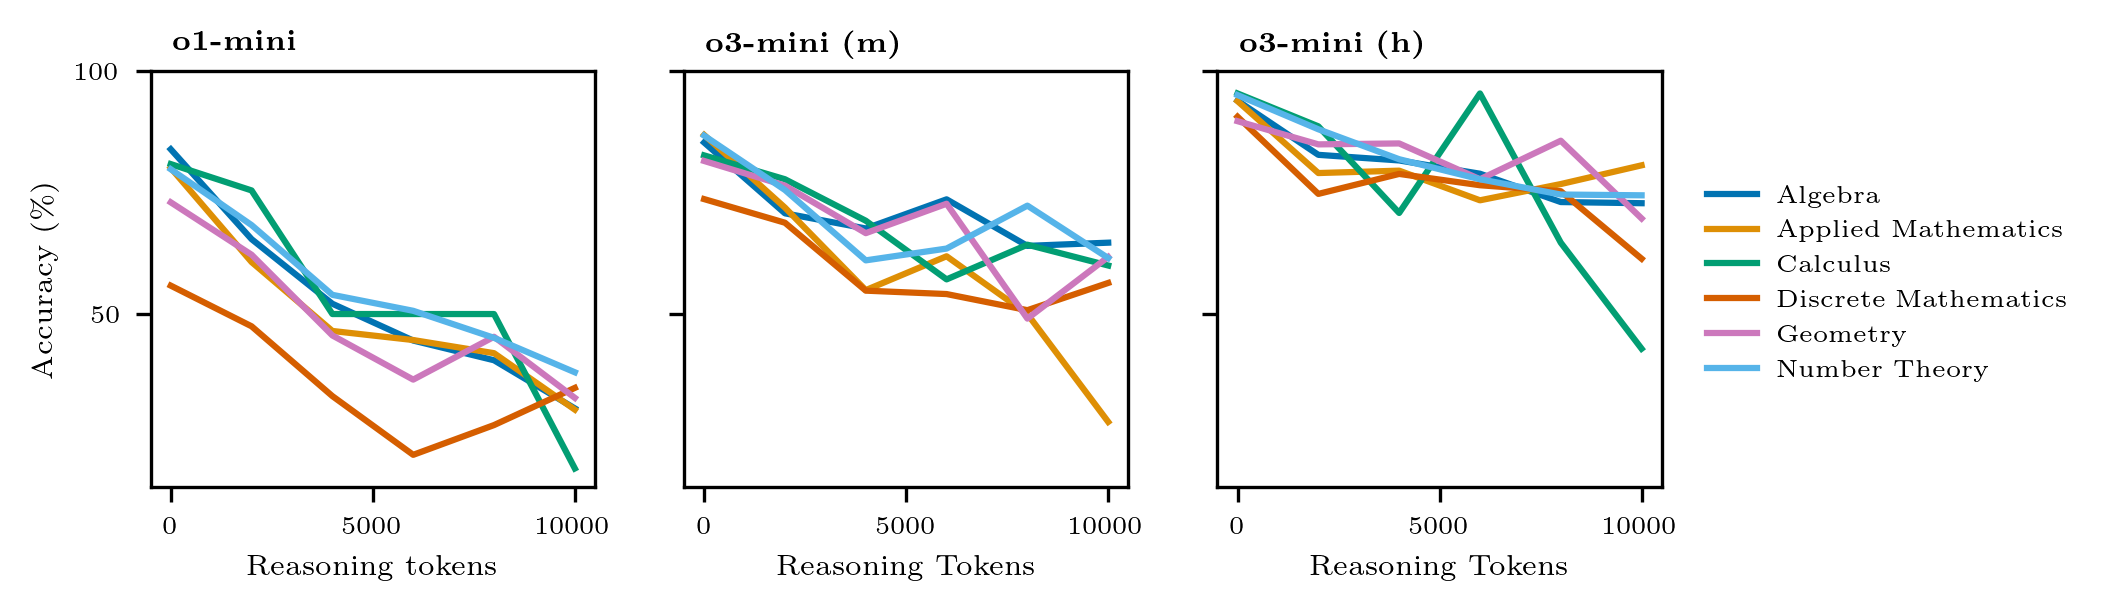

In [ ]:
#We take the multi-domain questions in account for each domain (using explode)
#We delete the duplicates as some multi-domain questions have the same primary domain (different secondary/tertiary... domains in their domain tree)

#======================================================== o1-mini ========================================================
Data_df_o1 = df_o1.explode('domain').reset_index()
Data_df_o1['domain'] = Data_df_o1['domain'].apply(parse_domain)
Data_df_deduplicated_o1 = Data_df_o1.drop_duplicates(subset=None)
Data_df_deduplicated_o1 = Data_df_deduplicated_o1.dropna() # there is one empty domain tree that gets value nan by parse_domain
Data_df_deduplicated_o1['domain'] = Data_df_deduplicated_o1['domain'].apply(lambda x: 'Calculus' if x == 'Precalculus' else x)

#======================================================== o3-mini (m) ========================================================
Data_df_o3 = df_o3.explode('domain').reset_index()
Data_df_o3['domain'] = Data_df_o3['domain'].apply(parse_domain)
Data_df_deduplicated_o3 = Data_df_o3.drop_duplicates(subset=None)
Data_df_deduplicated_o3 = Data_df_deduplicated_o3.dropna() # there is one empty domain tree that gets value nan by parse_domain
Data_df_deduplicated_o3['domain'] = Data_df_deduplicated_o3['domain'].apply(lambda x: 'Calculus' if x == 'Precalculus' else x)

#======================================================== o3-mini (h) ========================================================
Data_df_o3_high = df_o3_high.explode('domain').reset_index()
Data_df_o3_high['domain'] = Data_df_o3_high['domain'].apply(parse_domain)
Data_df_deduplicated_o3_high = Data_df_o3_high.drop_duplicates(subset=None)
Data_df_deduplicated_o3_high = Data_df_deduplicated_o3_high.dropna() # there is one empty domain tree that gets value nan by parse_domain
Data_df_deduplicated_o3_high['domain'] = Data_df_deduplicated_o3_high['domain'].apply(lambda x: 'Calculus' if x == 'Precalculus' else x)


color_dict = {'Algebra': '#0173b2', 'Applied Mathematics': '#de8f05', 'Calculus': '#029e73', 'Discrete Mathematics': '#d55e00', 'Geometry': '#cc78bc', 'Number Theory': '#56b4e9'}
DOMAINS = ['Algebra', 'Applied Mathematics', 'Calculus', 'Discrete Mathematics', 'Geometry', 'Number Theory']

#We take take 2x larger bin sizes because we split the number of datapoints into 6 domains (bins contain fewer questions)
edges_o1o3 = np.array([2000*i for i in range(13)])
edges_o3_high = np.array([2000*i for i in range(28)])

### Plot: Accuracy vs. Reasoning tokens stratified by domain
figA7, axA7 = plt.subplot_mosaic([['A', 'B', 'C']], figsize=(6.5, 9/5), dpi=300, sharex=True, sharey=True, gridspec_kw={'wspace': 0.2, 'hspace': 0.1})


for domain in DOMAINS:
    df_o1_domain = Data_df_deduplicated_o1[Data_df_deduplicated_o1['domain'] == domain]
    df_o3_domain = Data_df_deduplicated_o3[Data_df_deduplicated_o3['domain'] == domain]
    df_o3_high_domain = Data_df_deduplicated_o3_high[Data_df_deduplicated_o3_high['domain'] == domain]

    bins_o1_correct, edges_o1_correct = np.histogram(df_o1_domain[df_o1_domain['correctness'] == True]['reasoning_tokens'], bins=edges_o1o3)
    bins_o1_false, edges_o1_false = np.histogram(df_o1_domain[df_o1_domain['correctness'] == False]['reasoning_tokens'], bins=edges_o1o3)

    bins_o3_correct, edges_o3_correct = np.histogram(df_o3_domain[df_o3_domain['correctness'] == True]['reasoning_tokens'], bins=edges_o1o3)
    bins_o3_false, edges_o3_false = np.histogram(df_o3_domain[df_o3_domain['correctness'] == False]['reasoning_tokens'], bins=edges_o1o3)

    bins_o3_high_correct, edges_o3_high_correct = np.histogram(df_o3_high_domain[df_o3_high_domain['correctness'] == True]['reasoning_tokens'], bins=edges_o3_high)
    bins_o3_high_false, edges_o3_high_false = np.histogram(df_o3_high_domain[df_o3_high_domain['correctness'] == False]['reasoning_tokens'], bins=edges_o3_high)

    x_o1 = edges_o1o3.tolist()[0:6]
    y_o1 = (bins_o1_correct/(bins_o1_correct+bins_o1_false)).tolist()[0:6]
    x_o3 = edges_o1o3.tolist()[0:6]
    y_o3 = (bins_o3_correct/(bins_o3_correct+bins_o3_false)).tolist()[0:6]
    x_o3_high = edges_o3_high.tolist()[0:6]
    y_o3_high = (bins_o3_high_correct/(bins_o3_high_correct+bins_o3_high_false)).tolist()[0:6]

    sns.lineplot(x=x_o1, y=y_o1, color = color_dict[domain], ax = axA7['A'], linestyle='-')
    sns.lineplot(x=x_o3, y=y_o3, color = color_dict[domain], ax = axA7['B'], linestyle='-')
    sns.lineplot(x=x_o3_high, y=y_o3_high, color = color_dict[domain], ax = axA7['C'], linestyle='-')


axA7['A'].set_yticks([0.5, 1])
axA7['A'].set_yticklabels([50, 100], fontsize = 6)
axA7['A'].set_xticks([0,5000, 10000])
axA7['A'].set_xticklabels([0, 5000, 10000], fontsize = 6)
axA7['A'].set_ylabel(r'Accuracy (\%)', fontsize = 7)
axA7['A'].set_xlabel('Reasoning tokens', fontsize = 7)
axA7['B'].set_xticklabels([0,5000, 10000], fontsize = 6)
axA7['B'].set_xlabel('Reasoning Tokens', fontsize = 7)
axA7['C'].set_xticklabels([0,5000, 10000], fontsize = 6)
axA7['C'].set_xlabel('Reasoning Tokens', fontsize = 7)


#========================================================= Adjust layout ========================================================
axA7['A'].text(0.05, 1.1, r'\textbf{o1-mini}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA7['A'].transAxes, fontsize=7
               )
axA7['B'].text(0.05, 1.1, r'\textbf{o3-mini (m)}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA7['B'].transAxes, fontsize=7
               )
axA7['C'].text(0.05, 1.1, r'\textbf{o3-mini (h)}', horizontalalignment='left', weight= 'bold',
                  verticalalignment='top', transform=axA7['C'].transAxes, fontsize=7
               )
custom_handles_o1 = [
        mlines.Line2D([], [], color=color, lw=1.5, label=f'Tier {i+1}')
        for i, color in enumerate(color_dict.values())
    ]
axA7['C'].legend(custom_handles_o1, DOMAINS, fontsize=6, frameon=False, ncol=1, loc = 'lower left', bbox_to_anchor=(1.05, 0.20))

plt.savefig('FigureA7.png', dpi=300, bbox_inches='tight')
plt.show()